# BLACKBODY RADIATION

## Wien approximation

https://en.wikipedia.org/wiki/Wien_approximation

https://commons.wikimedia.org/wiki/File:Mplwp_blackbody_nu_planck-wien-rj_5800K.svg

https://commons.wikimedia.org/wiki/User:Geek3/mplwp

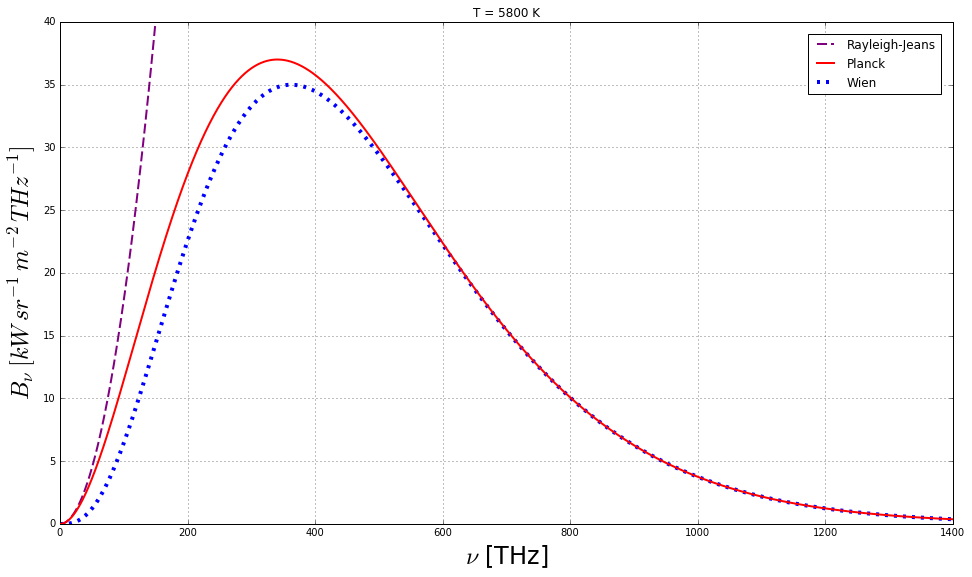

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from math import *


nameNu = 'Mplwp_blackbody_nu_planck-wien-rj_5800K.png'
nameLambda = 'Mplwp_blackbody_lambda_planck-wien-rj_5800K.png'
fig = plt.figure(figsize=(16,9))
xlim = 0, 1400; fig.gca().set_xlim(xlim)
ylim = 0, 40; fig.gca().set_ylim(ylim)
#fig.gca().xaxis.set_major_locator(mpl.ticker.MultipleLocator(400))


h = 6.62607e-34
c = 2.99792e8
kB = 1.38065e-23
T = 5800

def planck(nu, T):
    f = nu * 1e12
    if f == 0.0 or h * f / (kB * T) > 1e2:
        return 0.0
    #return 2 * h * f**3 / c**2 / (exp(h * f / (kB * T)) - 1.0)
    return 2 * h * f**3 / c**2 / (exp(h * f / (kB * T)) - 1.0)

def wien(nu, T):
    f = nu * 1e12
    if h * f / (kB * T) > 1e2:
        return 0.0
    return 2 * h * f**3 / c**2 * exp(-h * f / (kB * T))

def rayleigh_jeans(nu, T):
    f = nu * 1e12
    return 2 * f**2 * kB * T / c**2

x = np.linspace(xlim[0], xlim[1], 8001)
xlambda = 1/x[1:]
y_planck = [planck(xx, T) * 1e9 for xx in x]
y_wien = [wien(xx, T) * 1e9 for xx in x]
y_rj = [rayleigh_jeans(xx, T) * 1e9 for xx in x]
pp, = plt.plot(x, y_planck, '-', lw=2, color="red", label='Planck', zorder=3)
pw, = plt.plot(x, y_wien, ':', lw=4, color="blue", dashes=[3, 6], label='Wien', zorder=2)
pr, = plt.plot(x, y_rj, '--', lw=2, color="purple", dashes=[10, 4], label='Rayleigh-Jeans', zorder=1)

plt.xlabel(ur'$\nu$ [THz]', fontsize=24)
plt.ylabel(ur'$B_{\nu}\;[kW\,sr^{-1}\,m^{-2}\,THz^{-1}]$', fontsize=24)
plt.title('T = 5800 K')
plt.legend([pr, pp, pw], ['Rayleigh-Jeans', 'Planck', 'Wien'],
           loc='upper right', borderaxespad=1)
plt.grid(zorder=0)
plt.savefig(nameNu)
plt.show()

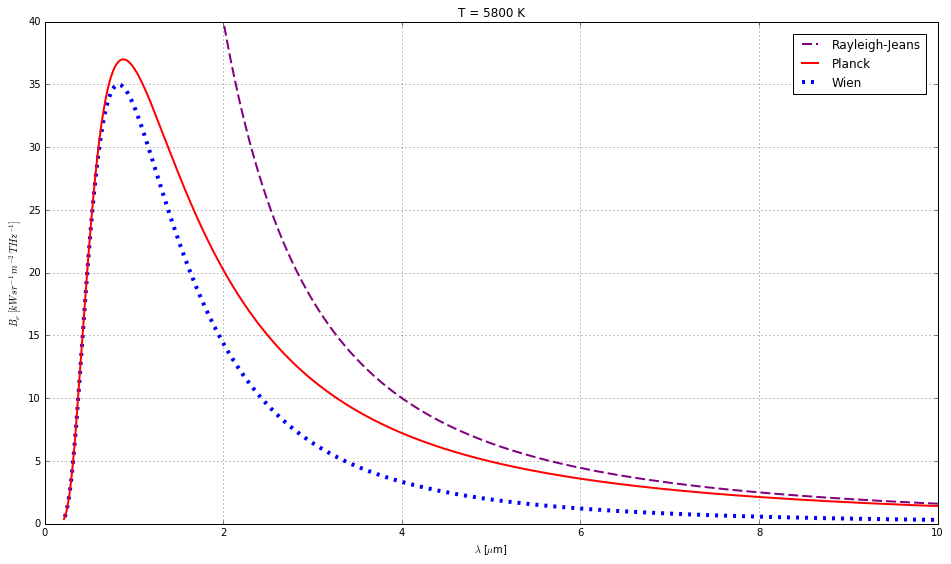

In [2]:
fig = plt.figure(figsize=(16,9))
xlambda = c/x[1:]
y_planck = [planck(c/xx, T) * 1e9 for xx in xlambda]
y_wien = [wien(c/xx, T) * 1e9 for xx in xlambda]
y_rj = [rayleigh_jeans(c/xx, T) * 1e9 for xx in xlambda]
pp, = plt.plot(xlambda * 1e-6, y_planck, '-', lw=2, color="red", label='Planck', zorder=3)
pw, = plt.plot(xlambda * 1e-6, y_wien, ':', lw=4, color="blue", dashes=[3, 6], label='Wien', zorder=2)
pr, = plt.plot(xlambda * 1e-6, y_rj, '--', lw=2, color="purple", dashes=[10, 4], label='Rayleigh-Jeans', zorder=1)

plt.xlabel(ur'$\lambda$ [$\mu$m]')
plt.ylabel(ur'$B_{\nu}\;[kW\,sr^{-1}\,m^{-2}\,THz^{-1}]$')
plt.title('T = 5800 K')
plt.legend([pr, pp, pw], ['Rayleigh-Jeans', 'Planck', 'Wien'],
           loc='upper right', borderaxespad=1)
plt.grid(zorder=0)
plt.xlim(0, 10.00)
plt.ylim(0, 40)
plt.savefig(nameLambda)
plt.show()